### Reading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data= pd.read_excel('iris.xls')

In [26]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing

In [27]:
data.shape

(150, 5)

In [28]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

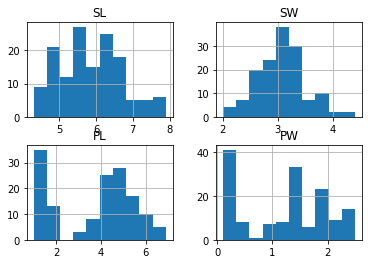

In [29]:
data.hist()
plt.show()

In [30]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [31]:
for i in ['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())

In [32]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

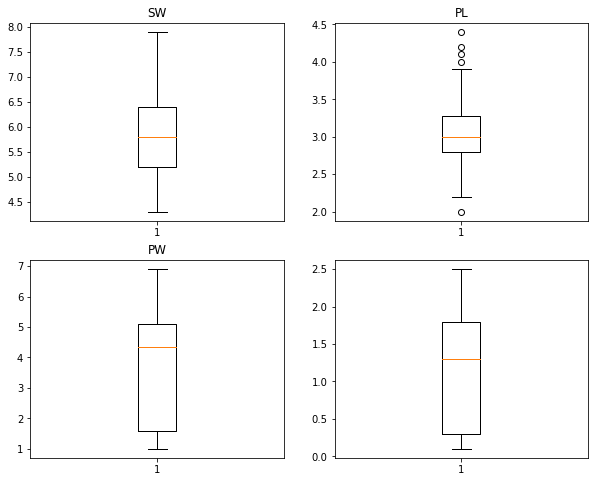

In [33]:
plt.figure(figsize=(10,8))
j=1
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.title(i)
    plt.subplot(2,2,j)
    plt.boxplot(data[i])
    j=j+1
plt.show()

In [37]:
#handling outliers
for i in ['PL']:
    Q1= np.percentile(data[i],25, interpolation='midpoint')
    Q2= np.percentile(data[i],50, interpolation='midpoint')
    Q3= np.percentile(data[i],75, interpolation='midpoint')
    if Q2== data[i].median():
        IQR= Q3-Q1
        low_lim= Q1-1.5*IQR
        up_lim= Q3+1.5*IQR
        outlier =[]
        for x in data[i]:
            if(x<low_lim)or (x>up_lim):
                outlier.append(x)
        ind2= data[i]>up_lim
        ind3= data[i]<low_lim
        indicestodrop2= data.loc[ind2].index
        indicestodrop3= data.loc[ind3].index
        data= data.drop(indicestodrop2)
        data= data.drop(indicestodrop3)
    else:
        print('check again')
data.shape

(150, 5)

### Classification models

In [46]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [59]:
#subclass preprocessing
from sklearn.preprocessing import LabelEncoder

#logistic regression can be used for multiple classes
le = LabelEncoder()
data['Classification']= le.fit_transform(data['Classification'])

data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [127]:
X= data.drop('Classification', axis=1)
y= data['Classification']

### Logistic Regression

In [140]:
#for multiple class?, iterations
lr= LogisticRegression(multi_class='multinomial', max_iter=1000)

model= lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))

0.9736842105263158


In [63]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

### kNN

In [99]:
#kNN model!
from sklearn.neighbors import KNeighborsClassifier

metric_k = []
neighbors = np.arange(3, 11)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

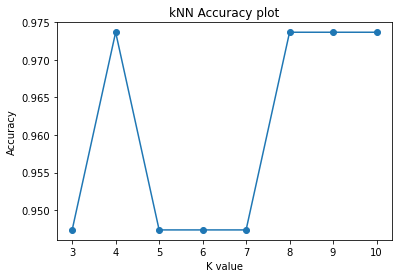

In [100]:
plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [101]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.9736842105263158

In [102]:
confusion_matrix(y_test, y_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### SVM Linear

In [115]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [104]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### SVM poly

In [105]:
from sklearn.svm import SVC
svmclf= SVC(kernel='poly')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

In [106]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

### SVM rbf

In [92]:
from sklearn.svm import SVC
svmclf= SVC(kernel='rbf')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

In [107]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

### Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [109]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [111]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### Which model gives best result?

In [131]:
svmclf= SVC(kernel='linear')
svmclf.fit(X_train, y_train)
y_pred= svmclf.predict(X_train)
accuracy_score(y_train, y_pred)

0.9642857142857143

In [119]:
confusion_matrix(y_train, y_pred)

array([[35,  0,  0],
       [ 0, 37,  2],
       [ 0,  2, 36]], dtype=int64)

In [120]:
rf.fit(X_train, y_train)
y_pred= rf.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

In [121]:
confusion_matrix(y_train, y_pred)

array([[35,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 38]], dtype=int64)

In [125]:
dt.fit(X_train, y_train)
y_pred= dt.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

In [126]:
confusion_matrix(y_train, y_pred)

array([[35,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 38]], dtype=int64)

In [132]:
rf.fit(X, y)
y_pred= rf.predict(X)
accuracy_score(y, y_pred)

1.0

In [133]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [135]:
dt.fit(X, y)
y_pred= dt.predict(X)
accuracy_score(y, y_pred)

1.0

In [136]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [137]:
svmclf= SVC(kernel='linear')
svmclf.fit(X, y)
y_pred= svmclf.predict(X)
accuracy_score(y, y_pred)

0.96

In [139]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

Out of the models which gives best results is SVM linear, decision trees
and random forest.

Taking more number of data values, decision trees and random forest gives
best results clearly.